# Modtran LibRadTran Models comparison on true astrophysical objects
===========================================================================================================

- author Sylvie Dagoret-Campagne
- creation date March 14th 2017
- update May 4th 2017

## The goal is to compare LibRadTran with ModTran
-------------------------------------------------------------------

- Now Modtran has 1nm steps instead of 0.5 nm.
- I have just changed the input file sheet for Modtran



# Python  Packages
=========================

In [57]:
import rise
rise.__version__

'4.0.0b1'

In [58]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [59]:
import pandas as pd
import os
import re
import numpy as np

In [60]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [61]:
from scipy.interpolate import interp1d

In [62]:
import os

In [63]:
import string

In [64]:
import libLSSTMagnitude as magnit # the python package I have developped to compute mangnitudes and SED
                                  # to be replaced by pysynphot (which will provide many SED)

In [65]:
import pysynphot as S

In [66]:
pysynphot_root_path=os.environ['PYSYN_CDBS']

## SED
============


Kirk sent me several SED in excel files.
Those are open here

In [67]:
path_sed=os.path.join(pysynphot_root_path,'hst/cdbs/grid')

In [219]:
path_sed='./SED'

In [218]:
filename_star=['Star.B1.No.3.xlsx']
filename_gal=['Gal.S0.template.xlsx','Gal.BC.95.No.1.xlsx','Gal.GS.39.No.2.xlsx']
filename_pick_uk_xcl=['Pick.UK.No.2.22.xlsx','Pick.UK.50.No.4.xlsx']
filename_pick_uk_fits=['pickles_uk_22.fits','pickles_uk_50.fits']    # fits are the same file as above xcl file
filename_pick_110=['Pickles.No.1.110.xlsx','pickles_110.fits','pickles_110.ascii.txt'] # same files
filename_gal_allz='Ga.BC.95.No1.z.ALL_pad0.xlsx'

## 2) Open Modtran Files
=============================


Here I change the input file for Modtran.
I take care of field decoding

In [70]:
#modtran_path="modtran_samples/MT_FirstSamples"
modtran_path="modtran_samples/MT_SamplesMarch2017_1nm"

In [71]:
#file6='Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx'
file6='Atmo.1.5_copy.1nm.steps.copy.xlsx'

## 2.1) File 6 : Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx

I made a mistake here because I read the first sheet instead of the second sheet

In [72]:
fullfile6=os.path.join(modtran_path,file6)
mtfile6 = pd.ExcelFile(fullfile6)
sheet_name=mtfile6.sheet_names[1]
#df_colname6 = mtfile6.parse(sheet_name,index_row=0,usecols=range(0,9))
df6 = mtfile6.parse(sheet_name,header=0,usecols=range(0,11))
#df6.columns = ["wl","z15_pwv","z15_O2","z15_oz","z15_sc"]
#df6.columns = ["wl","z15_comb","z15_pwv","z15_oz","z15_sc","dummy","z15_O2"]

In [73]:
df6.head()

,1,2,3,4,5,6,7,8,9
1,361976 U,S STAND,ARD,0,0,0.00,0,0.0,0.0
2,2.70000 1,0,0 48.2,0000 14,4.66635,0.95,509 0,0.0,0.0
3,WAVELENGTH,COMBIN,H2O,O3,MOLEC,NaN,UMIX,NaN,NaN
4,(NM),TRANS,TRANS,TRANS,SCAT,NaN,TRANS (O2),NaN,NaN
5,250,0,1,0,0.0536,NaN,0.1014,NaN,NaN


In [74]:
print sheet_name

Sheet2


In [75]:
df6 = mtfile6.parse(sheet_name,header=4)
df6.columns = ["dummy0","wl","z15_comb","z15_pwv","z15_oz","z15_sc","dummy","z15_O2","dummy2","dummy3"]

In [76]:
df6.head()

,dummy0,wl,z15_comb,z15_pwv,z15_oz,z15_sc,dummy,z15_O2,dummy2,dummy3
0,5,250,0.0,1.0,0.0,0.0536,NaN,0.1014,NaN,NaN
1,7,251,0.0,1.0,0.0,0.0565,NaN,0.1305,NaN,NaN
2,9,252,0.0,1.0,0.0,0.0594,NaN,0.1639,NaN,NaN
3,11,253,0.0,1.0,0.0,0.0625,NaN,0.2013,NaN,NaN
4,13,254,0.0,1.0,0.0,0.0656,NaN,0.2422,NaN,NaN


### Path to LibRadTran files for pure scattering atmosphere

In [77]:
path_atm_rt_us_sc="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sc/out"

### Path to LibRadTran for pure absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [78]:
path_atm_rt_us_ab_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/oz/out'
path_atm_rt_us_ab_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/wv/out'

### Path to LibRadTran for scattering and absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [79]:
path_atm_rt_us_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/oz/out'
path_atm_rt_us_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/wv/out'

# Read All, scattering and absorption

In [80]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=1)

In [81]:
detdatafilename='data/transmissions-LSST.dat'

## Read LSST filter data with pandas

In [82]:
df=pd.read_csv(detdatafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

### Restrict to this range for Filter and atmosphere

In [83]:
WLMIN=3000.
WLMAX=11000.

In [84]:
wl=np.asarray(df['wl'])*10  # in Angstrom
u=np.asarray(df['U'])*0.01
g=np.asarray(df['G'])*0.01
r=np.asarray(df['R'])*0.01
i=np.asarray(df['I'])*0.01
z=np.asarray(df['Z'])*0.01
y4=np.asarray(df['Y4'])*0.01
atm=np.asarray(df['atm'])*0.01

In [85]:
y4[np.where(wl>11000)]=0

In [86]:
u=u[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
g=g[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
r=r[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
i=i[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
z=z[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
y4=y4[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
atm=atm[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]
wl=wl[np.where(np.logical_and(wl>=WLMIN,wl<WLMAX))]

In [87]:
NBWL=wl.shape[0]

In [88]:
print WLMIN,WLMAX,NBWL

3000.0 11000.0 800


## Transfer Filter data to Pysynphot

In [89]:
bp_u = S.ArrayBandpass(wl,u, name='LSST_U')
bp_g = S.ArrayBandpass(wl,g, name='LSST_G')
bp_r = S.ArrayBandpass(wl,r, name='LSST_R')
bp_i = S.ArrayBandpass(wl,i, name='LSST_I')
bp_z = S.ArrayBandpass(wl,z, name='LSST_Z')
bp_y4 = S.ArrayBandpass(wl,y4, name='LSST_Y4')
bp_atm= S.ArrayBandpass(wl,atm, name='LSST_ATM')

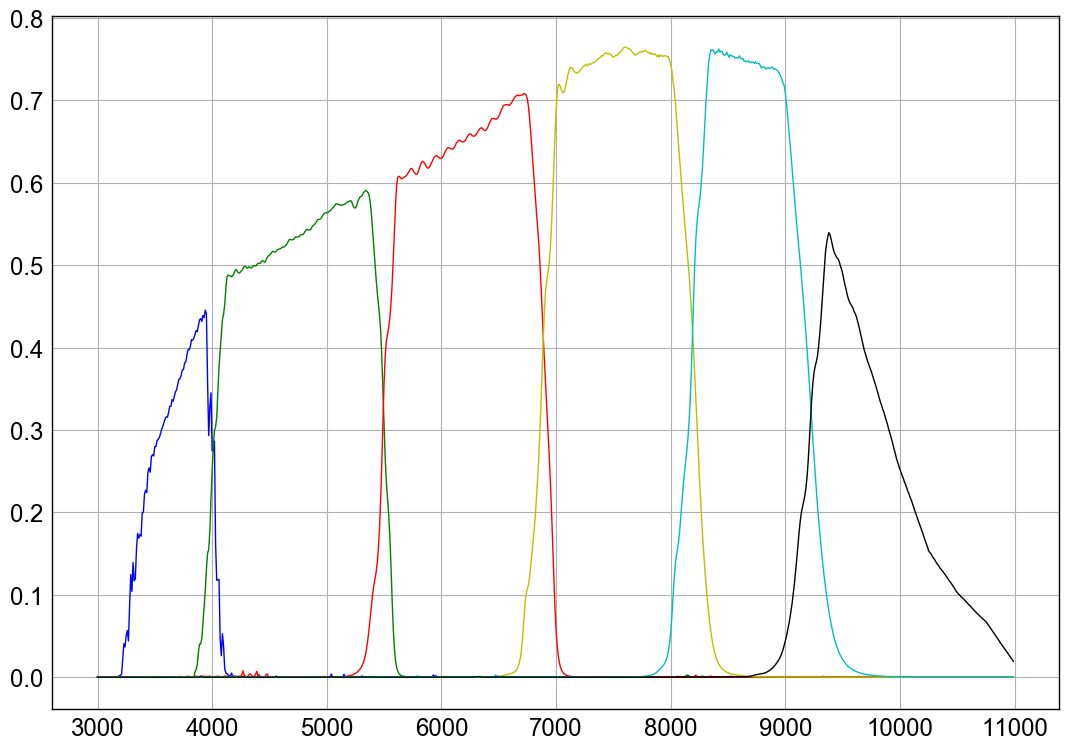

In [90]:
plt.plot(bp_u.wave, bp_u.throughput,'b')
plt.plot(bp_g.wave, bp_g.throughput,'g')
plt.plot(bp_r.wave, bp_r.throughput,'r')
plt.plot(bp_i.wave, bp_i.throughput,'y')
plt.plot(bp_z.wave, bp_z.throughput,'c')
plt.plot(bp_y4.wave, bp_y4.throughput,'k')

## Read atmospheric data

### Extract atmospheric transmission data from Modtran

In [91]:
x_mt=df6["wl"]
pwv_mt=df6["z15_pwv"]
o2_mt=df6["z15_O2"]
oz_mt=df6["z15_oz"]
sc_mt=df6["z15_sc"]
y_mt=pwv_mt*o2_mt*oz_mt*sc_mt

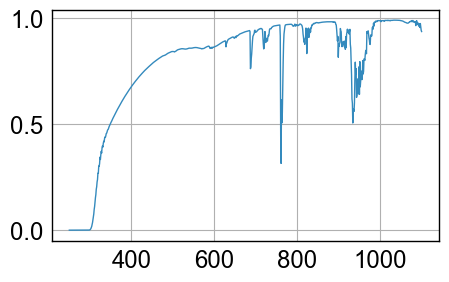

In [92]:
plt.figure(figsize=(5,3))
plt.plot(x_mt,y_mt)

In [93]:
#x_mt=np.array(x_mt*10)
#y_mt=np.array(y_mt)
x_mt=np.array(x_mt)
y_mt=np.array(y_mt)
x_mt=np.array(x_mt*10)

In [94]:
y_mt=y_mt[np.where(np.logical_and(x_mt>=WLMIN,x_mt<WLMAX))]
x_mt=x_mt[np.where(np.logical_and(x_mt>=WLMIN,x_mt<WLMAX))]


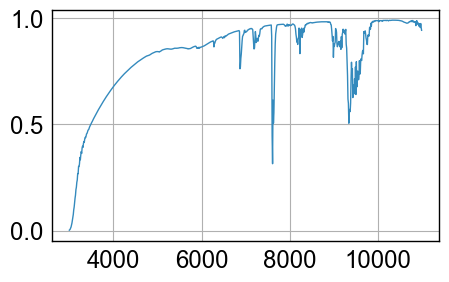

In [95]:
plt.figure(figsize=(5,3))
plt.plot(x_mt,y_mt)

### Extract atmospheric transmission data from LibRadTran

In [96]:
sc_rt_path=os.path.join(path_atm_rt_us_sc,'RT_LS_pp_us_sc_rt_z15.OUT')
abs_rt_pwv_path=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z15_wv40.OUT')
abs_rt_oz_path=os.path.join(path_atm_rt_us_ab_rt_oz,'RT_LS_pp_us_ab_rt_z15_oz32.OUT')
sa_rt_pwv_path=os.path.join(path_atm_rt_us_sa_rt_pwv,'RT_LS_pp_us_sa_rt_z15_wv40.OUT')
sa_rt_oz_path=os.path.join(path_atm_rt_us_sa_rt_oz,'RT_LS_pp_us_sa_rt_z15_oz32.OUT')

In [97]:
data1=np.loadtxt(sc_rt_path)
data2=np.loadtxt(abs_rt_pwv_path)
data3=np.loadtxt(abs_rt_oz_path)
data4=np.loadtxt(sa_rt_pwv_path)
data5=np.loadtxt(sa_rt_oz_path)

In [98]:
x_rt_1=data1[:,0]   # pure scattering
y_rt_1=data1[:,1]

x_rt_2=data2[:,0]   # pure absorption (H2O = 4mm) 
y_rt_2=data2[:,1]

x_rt_3=data3[:,0]   # pure absorption (OZ = 320 Db) 
y_rt_3=data3[:,1]

x_rt_4=data4[:,0]   # Both absorption and scattering (H2O = 4 mm)
y_rt_4=data4[:,1]

x_rt_5=data5[:,0]   # Both absorption and scattering (OZ = 320 mm)
y_rt_5=data5[:,1]

#### multply scattering by absorption

In [99]:
y_rt_6=y_rt_1*y_rt_2
y_rt_7=y_rt_1*y_rt_3

In [100]:
x_rt_1=np.array(10*x_rt_1)
x_rt_2=np.array(10*x_rt_2)
x_rt_3=np.array(10*x_rt_3)
x_rt_4=np.array(10*x_rt_4)
x_rt_5=np.array(10*x_rt_5)

In [101]:
y_rt_4=y_rt_4[np.where(np.logical_and(x_rt_4>=WLMIN,x_rt_4<WLMAX))]
y_rt_5=y_rt_5[np.where(np.logical_and(x_rt_5>=WLMIN,x_rt_5<WLMAX))]
y_rt_6=y_rt_6[np.where(np.logical_and(x_rt_1>=WLMIN,x_rt_1<WLMAX))]
y_rt_7=y_rt_7[np.where(np.logical_and(x_rt_1>=WLMIN,x_rt_1<WLMAX))]


x_rt_1=x_rt_1[np.where(np.logical_and(x_rt_1>=WLMIN,x_rt_1<WLMAX))]
x_rt_4=x_rt_4[np.where(np.logical_and(x_rt_4>=WLMIN,x_rt_4<WLMAX))]
x_rt_5=x_rt_5[np.where(np.logical_and(x_rt_5>=WLMIN,x_rt_5<WLMAX))]

# Plot the transparency for comparison Modtran/LibRadTran

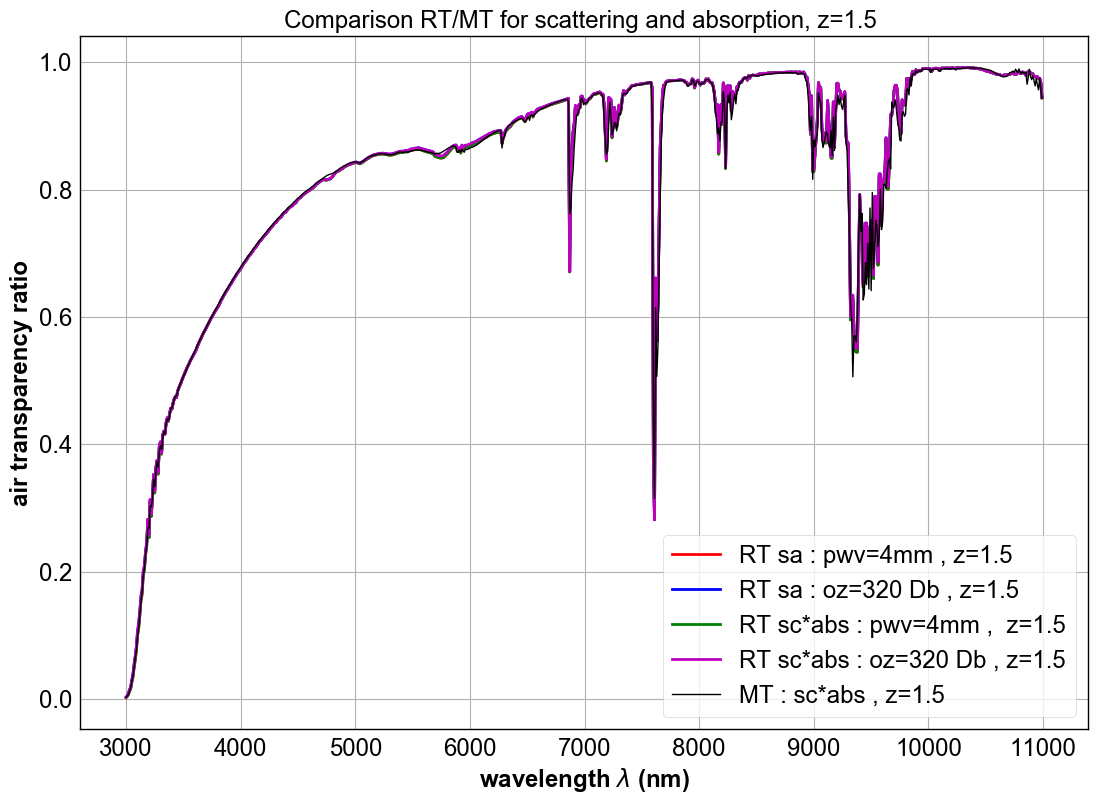

In [102]:
plt.title('Comparison RT/MT for scattering and absorption, z=1.5 ')
plt.plot(x_rt_4,y_rt_4,'r-',lw=2,label = 'RT sa : pwv=4mm , z=1.5')
plt.plot(x_rt_5,y_rt_5,'b-',lw=2,label = 'RT sa : oz=320 Db , z=1.5')
plt.plot(x_rt_1,y_rt_6,'g-',lw=2,label = 'RT sc*abs : pwv=4mm ,  z=1.5')
plt.plot(x_rt_1,y_rt_7,'m-',lw=2,label = 'RT sc*abs : oz=320 Db , z=1.5')
plt.plot(x_mt,y_mt,'k-',lw=1,label = 'MT : sc*abs , z=1.5')
plt.legend(loc=4)
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")

### Compute the ratio of air transparency

In [103]:
# define an interpolation function of Modtran, in order to have the same binning in wavelength
#interpol_atm_mt=interp1d(x_mt,y_mt)

(0.8, 1.2)

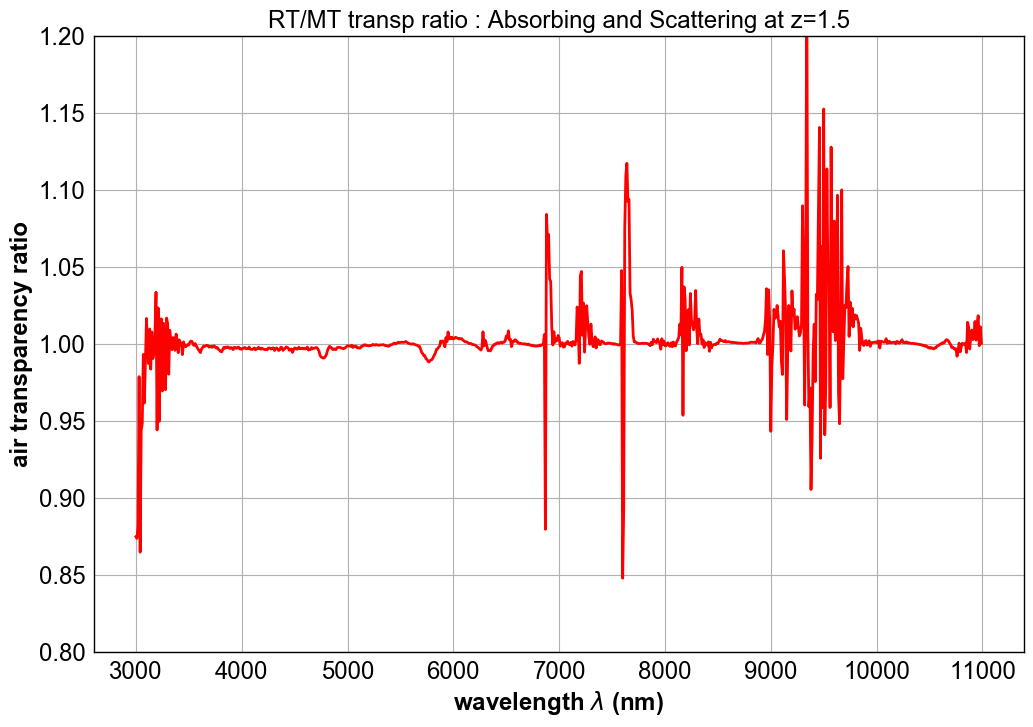

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ratio=y_rt_4/y_mt
ax.plot(x_mt,ratio,"r-",lw=2)
ax.set_title("RT/MT transp ratio : Absorbing and Scattering at z=1.5")
ax.set_xlabel("wavelength $\lambda$ (nm)")
ax.set_ylabel("air transparency ratio")
ax.set_ylim(00.8,1.2)
#ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.grid(b=True, which='major', color='k', linewidth=2.0)
#ax.grid(b=True, which='minor', color='k', linewidth=0.5)

- It is very interesting to notice the Ozone Chappuis band is the same in LibRadTran and in Modtran
- Perhaps there is a little disagreement on Huygens Ozone at 300 nm.
- We may have this disagreement on the wavelength position of the O2 abs line.
- Concerning H2O band, we probably should smooth the absorption spectrum.
- But we can also compare magnitudes in LSST filters

## Transfer atmosphere to PySynphot

In [105]:
bp_u_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=u*y_mt, name='LSST_U_ATM_MT')
bp_g_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=g*y_mt, name='LSST_G_ATM_MT')
bp_r_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=r*y_mt, name='LSST_R_ATM_MT')
bp_i_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=i*y_mt, name='LSST_I_ATM_MT')
bp_z_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=z*y_mt, name='LSST_Z_ATM_MT')
bp_y4_atm_mt = S.ArrayBandpass(wave=x_mt,throughput=y4*y_mt, name='LSST_Y4_ATM_MT')

In [127]:
bp_u_atm_mt.binning=10.
bp_g_atm_mt.binning=10.
bp_r_atm_mt.binning=10.
bp_i_atm_mt.binning=10.
bp_z_atm_mt.binning=10.
bp_y4_atm_mt.binning=10.

In [128]:
print bp_u_atm_mt.binning

10.0


In [106]:
bp_u_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=u*y_rt_4, name='LSST_U_ATM_RT')
bp_g_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=g*y_rt_4, name='LSST_G_ATM_RT')
bp_r_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=r*y_rt_4, name='LSST_R_ATM_RT')
bp_i_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=i*y_rt_4, name='LSST_I_ATM_RT')
bp_z_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=z*y_rt_4, name='LSST_Z_ATM_RT')
bp_y4_atm_rt = S.ArrayBandpass(wave=x_rt_4,throughput=y4*y_rt_4, name='LSST_Y4_ATM_RT')

In [122]:
bp_u_atm_rt.binning=10.
bp_g_atm_rt.binning=10.
bp_r_atm_rt.binning=10.
bp_i_atm_rt.binning=10.
bp_z_atm_rt.binning=10.
bp_y4_atm_rt.binning=10.

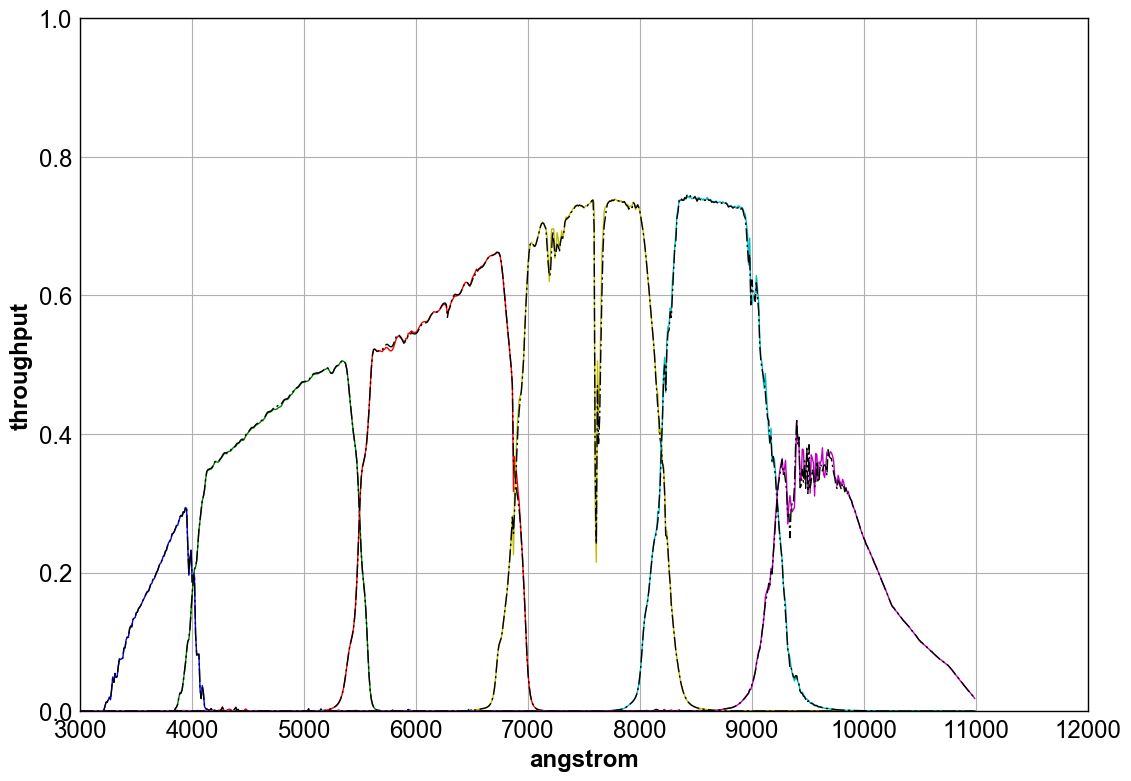

In [123]:
plt.plot(bp_u_atm_rt.wave, bp_u_atm_rt.throughput, 'b-',bp_u_atm_mt.wave, bp_u_atm_mt.throughput, 'k-.')
plt.plot(bp_g_atm_rt.wave, bp_g_atm_rt.throughput, 'g-',bp_g_atm_mt.wave, bp_g_atm_mt.throughput, 'k-.')
plt.plot(bp_r_atm_rt.wave, bp_r_atm_rt.throughput, 'r-',bp_r_atm_mt.wave, bp_r_atm_mt.throughput, 'k-.')
plt.plot(bp_i_atm_rt.wave, bp_i_atm_rt.throughput, 'y-',bp_i_atm_mt.wave, bp_i_atm_mt.throughput, 'k-.')
plt.plot(bp_z_atm_rt.wave, bp_z_atm_rt.throughput, 'c-',bp_z_atm_mt.wave, bp_z_atm_mt.throughput, 'k-.')
plt.plot(bp_y4_atm_rt.wave, bp_y4_atm_rt.throughput, 'm-',bp_y4_atm_mt.wave, bp_y4_atm_mt.throughput, 'k-.')
plt.xlim(3000, 12000)
plt.ylim(0, 1.)
plt.xlabel(bp_u_atm_rt.waveunits)
plt.ylabel('throughput')
plt.legend()

# Observation

In [155]:
class ListTable(list):
    """ 
    Very usefull tool found on web to plot a table :
    Overridden list class which takes a 2-dimensional list of 
    the form [[1,2,3],[4,5,6]], and renders an HTML Table in IPython Notebook. 
    """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [156]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [157]:
def ShowMagnitudeTable(mag_rt,mag_mt):
    diff_mag=(mag_rt - mag_mt)*1000. # transform into  mmag
    diffmag_cut=np.trunc(diff_mag*100)/100.  # cut not signiticative digit
    table = ListTable()
    table.append(['U (mmag)', 'G(mmag)', 'R(mmag)', 'I(mmag)', 'Z(mmag)', 'Y4(mmag)'])
    table.append(diffmag_cut)
    return table   

In [193]:
def PlotSED(sp):
    """
    Function to plot the input SED:
    - Input wl : wavelength
    - Input sed : the SED to be plotted
    - Input thetitle : title of the plot
    """
    name=sp.name
    splitname=name.split('/')
    cutname=splitname[len(splitname)-1]
    
    plt.figure(figsize=(6,4))
    plt.plot(sp.wave, sp.flux, 'r')
    plt.title(cutname)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('sed')
    plt.xlim(2500,12000)
    

## Standard candle : Vega

In [283]:
title=S.Vega.name

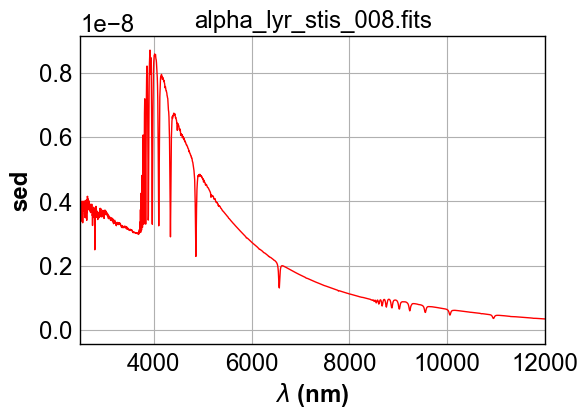

In [194]:
PlotSED(S.Vega)

In [124]:
obs_u_rt = S.Observation(S.Vega,bp_u_atm_rt)
obs_g_rt = S.Observation(S.Vega,bp_g_atm_rt)
obs_r_rt = S.Observation(S.Vega,bp_r_atm_rt)
obs_i_rt = S.Observation(S.Vega,bp_i_atm_rt)
obs_z_rt = S.Observation(S.Vega,bp_z_atm_rt)
obs_y4_rt = S.Observation(S.Vega,bp_y4_atm_rt)

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [132]:
obs_u_mt = S.Observation(S.Vega,bp_u_atm_mt)
obs_g_mt = S.Observation(S.Vega,bp_g_atm_mt)
obs_r_mt = S.Observation(S.Vega,bp_r_atm_mt)
obs_i_mt = S.Observation(S.Vega,bp_i_atm_mt)
obs_z_mt = S.Observation(S.Vega,bp_z_atm_mt)
obs_y4_mt = S.Observation(S.Vega,bp_y4_atm_mt)

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


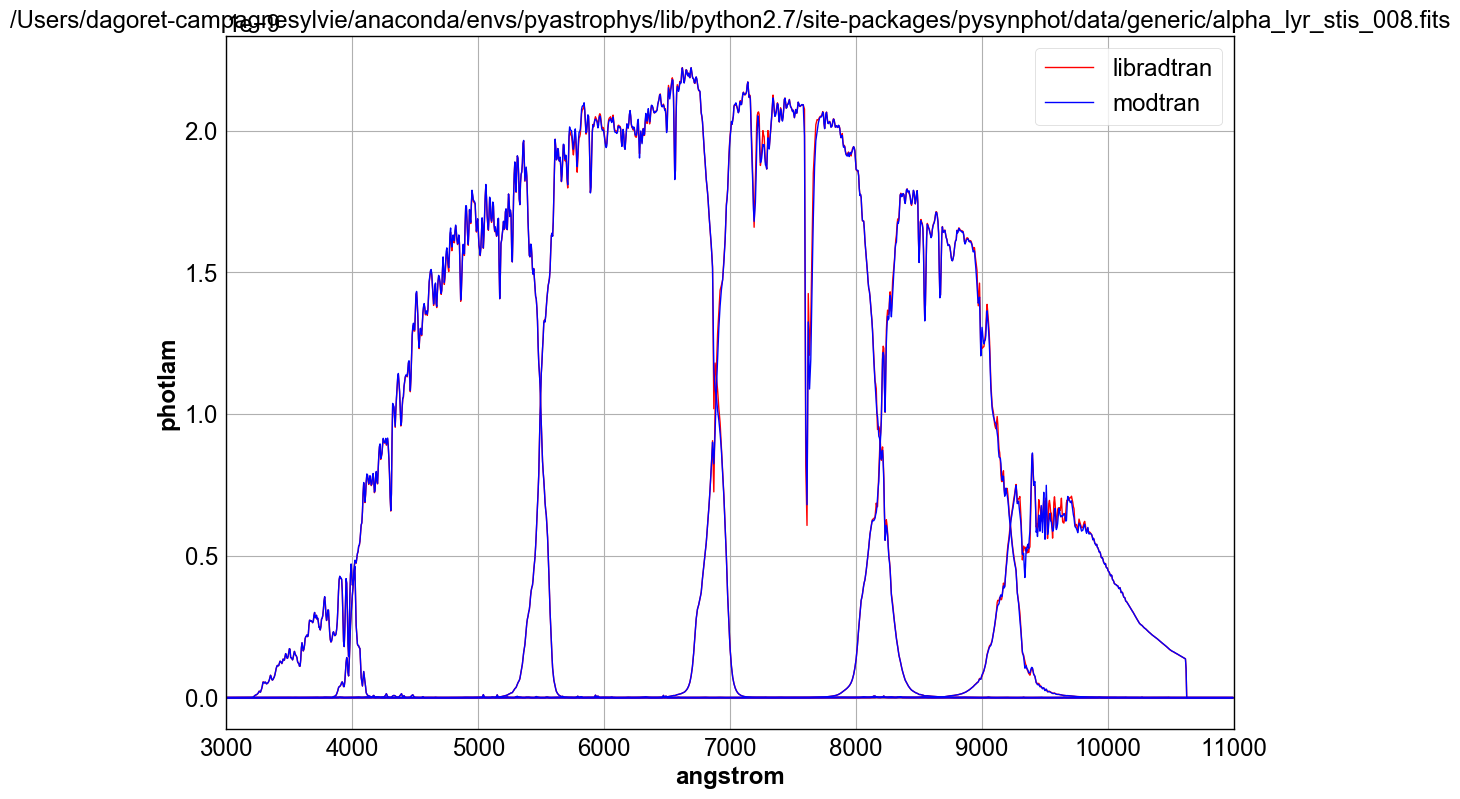

In [284]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [149]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [158]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.49,2.67,-0.24,-7.02,-5.66,-10.8


## Black-Body

- Parameter T = 5000 K

In [281]:
title=S.BlackBody(5000).name

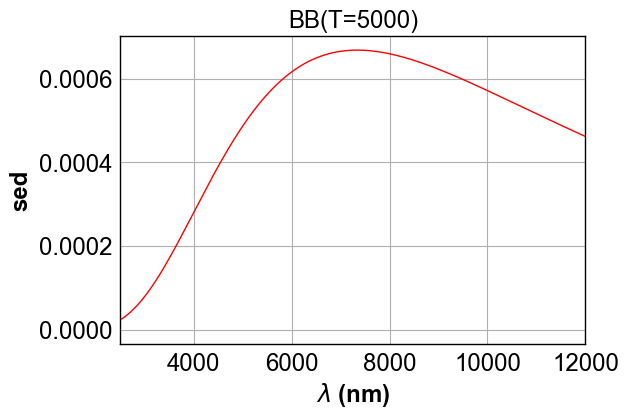

In [195]:
PlotSED(S.BlackBody(5000))

In [159]:
obs_u_rt = S.Observation(S.BlackBody(5000),bp_u_atm_rt)
obs_g_rt = S.Observation(S.BlackBody(5000),bp_g_atm_rt)
obs_r_rt = S.Observation(S.BlackBody(5000),bp_r_atm_rt)
obs_i_rt = S.Observation(S.BlackBody(5000),bp_i_atm_rt)
obs_z_rt = S.Observation(S.BlackBody(5000),bp_z_atm_rt)
obs_y4_rt = S.Observation(S.BlackBody(5000),bp_y4_atm_rt)

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [160]:
obs_u_mt = S.Observation(S.BlackBody(5000),bp_u_atm_mt)
obs_g_mt = S.Observation(S.BlackBody(5000),bp_g_atm_mt)
obs_r_mt = S.Observation(S.BlackBody(5000),bp_r_atm_mt)
obs_i_mt = S.Observation(S.BlackBody(5000),bp_i_atm_mt)
obs_z_mt = S.Observation(S.BlackBody(5000),bp_z_atm_mt)
obs_y4_mt = S.Observation(S.BlackBody(5000),bp_y4_atm_mt)

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


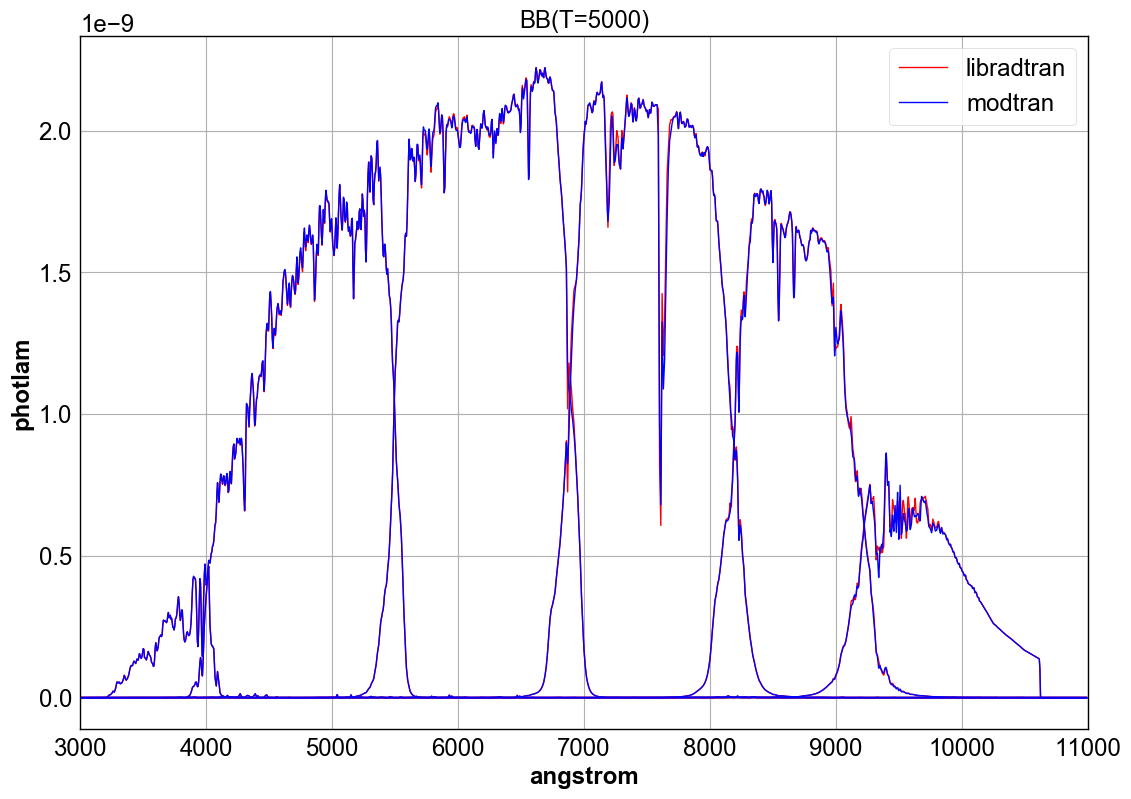

In [282]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [162]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [163]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.31,2.32,-0.63,-6.95,-5.5,-10.24


## Star
=========

In [168]:
fullfilename_star=os.path.join(path_sed,filename_star[0])
wl_star,sed_star=magnit.ReadSED(fullfilename_star)
title=filename_star[0]
wl_star*=10

In [280]:
title=filename_star[0]

In [169]:
sp = S.ArraySpectrum(wl_star, sed_star, name=filename_star[0])

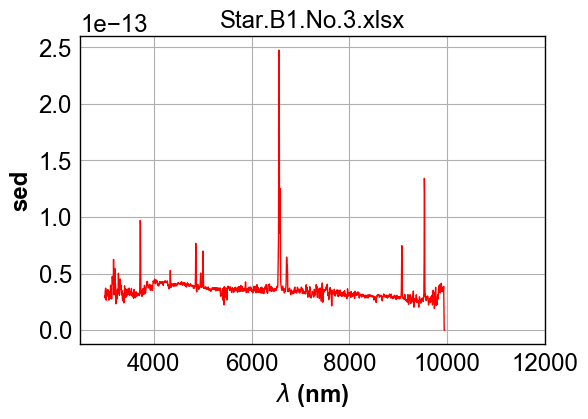

In [196]:
PlotSED(sp)

In [202]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [203]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


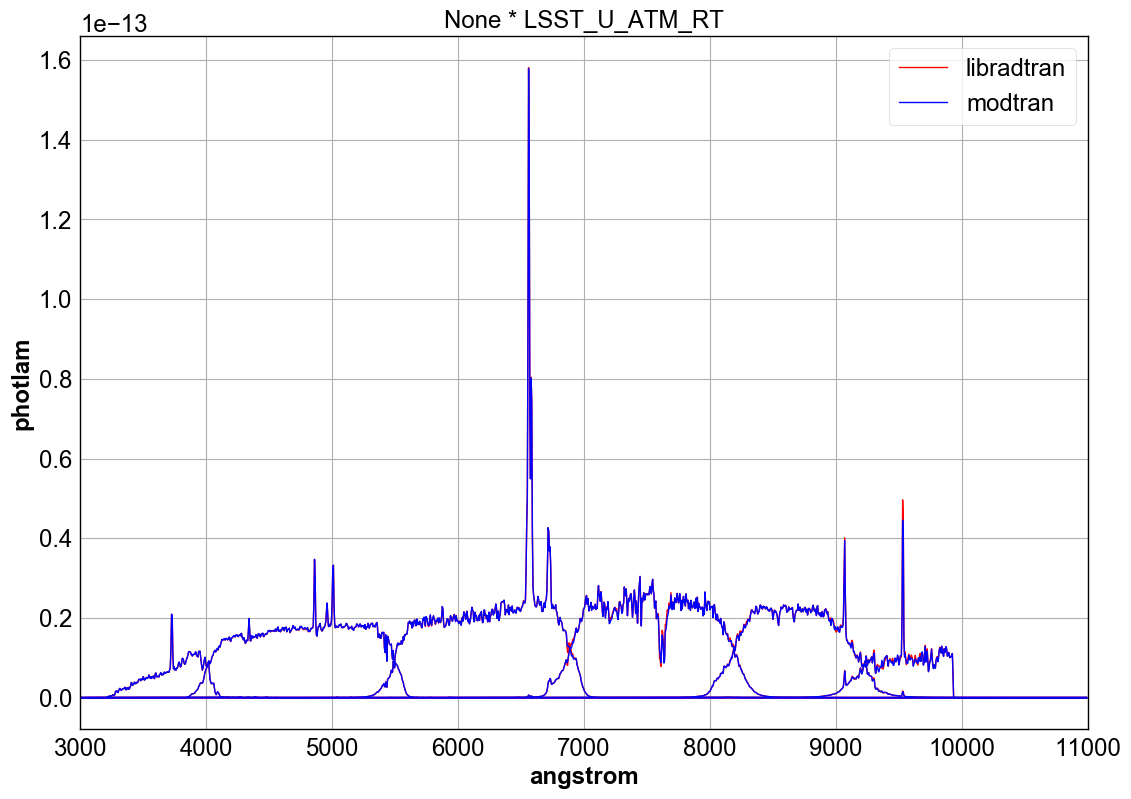

In [204]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [205]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [206]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.24,2.59,-0.62,-6.57,-5.74,-21.95


## Galaxies
================

In [220]:
fullfilename_gal= [  os.path.join(path_sed,filename_gal[j])  for j in range(0,3) ]

### Gal S0 template
---------------------

In [207]:
galS0temp = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'kc96', 'S0_template.fits'))

In [279]:
title=galS0temp.name

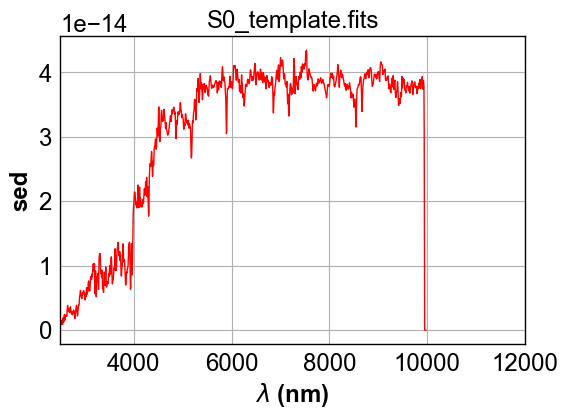

In [208]:
PlotSED(galS0temp)

In [209]:
obs_u_rt = S.Observation(galS0temp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(galS0temp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(galS0temp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(galS0temp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(galS0temp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(galS0temp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [210]:
obs_u_mt = S.Observation(galS0temp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(galS0temp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(galS0temp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(galS0temp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(galS0temp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(galS0temp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


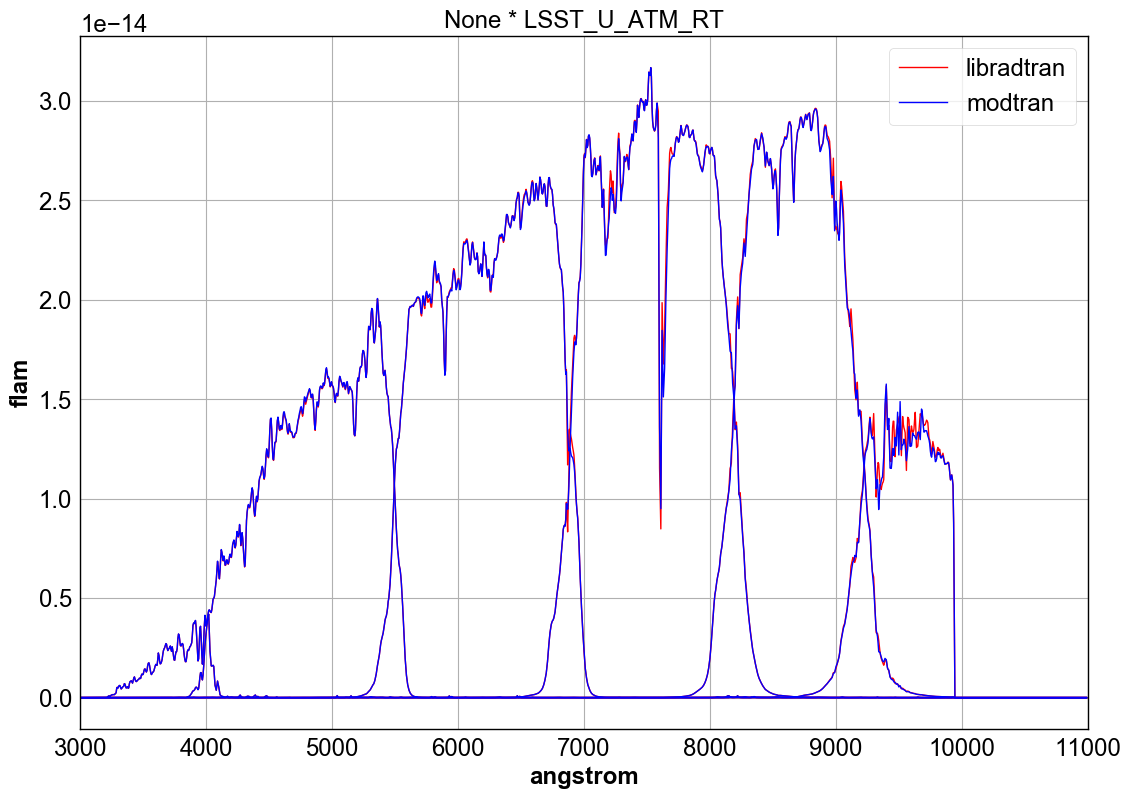

In [211]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [212]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [213]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.25,2.28,-0.72,-6.83,-5.7,-18.45


### Gal BC 95
--------------

In [221]:
wl_gal_1,sed_gal_1=magnit.ReadSED(fullfilename_gal[1],headerstop=22)

In [222]:
wl_gal_1*=10

In [285]:
title=filename_gal[1]

In [223]:
sp = S.ArraySpectrum(wl_gal_1, sed_gal_1, name=filename_gal[1])

In [215]:
#galBC95temp = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'bc95','templates' ,'bc95_a_10E5.fits'))

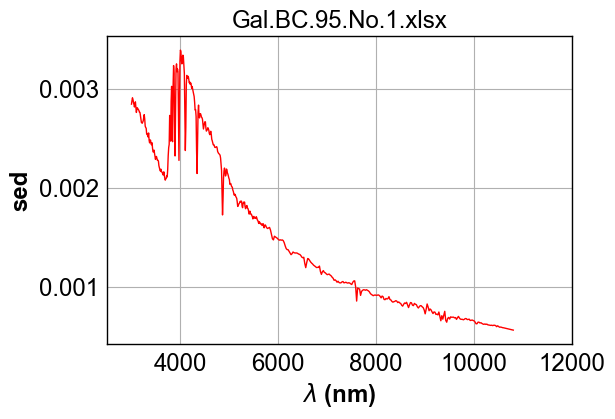

In [224]:
PlotSED(sp)

In [225]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [226]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


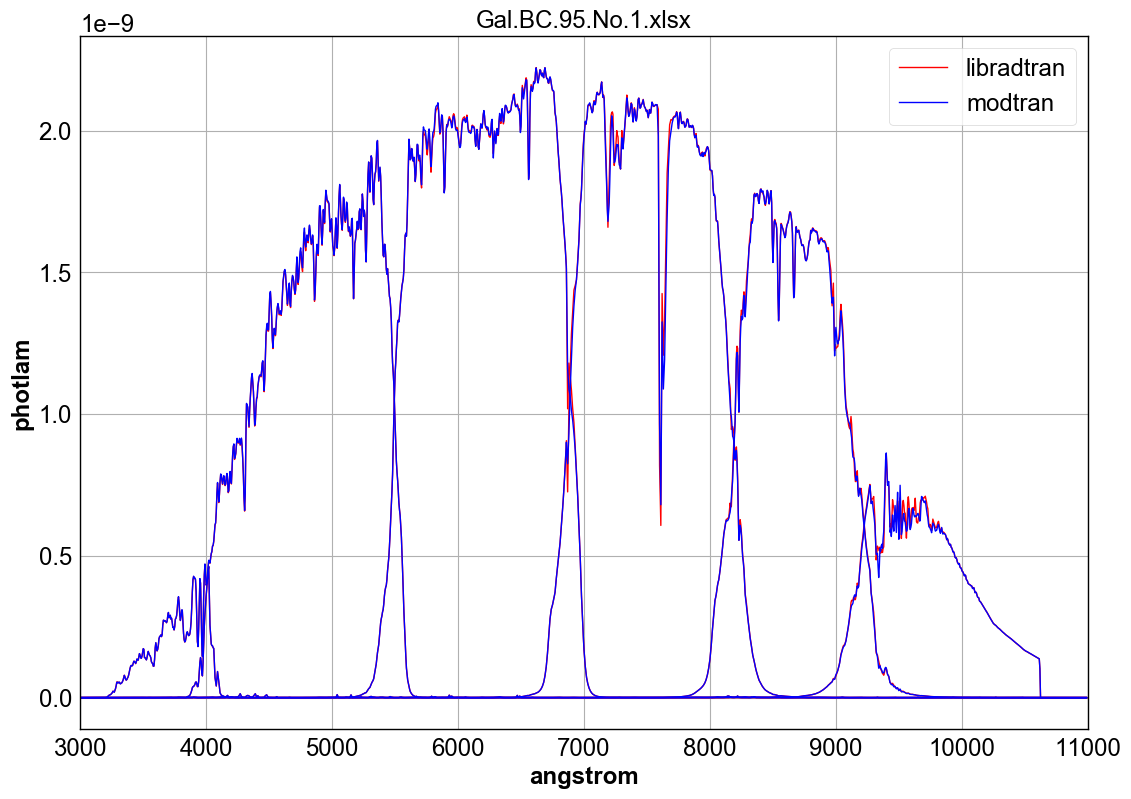

In [286]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [228]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [229]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.27,2.72,-0.28,-7.0,-5.49,-13.11


### Gal GS 39 No 2
---------------------

In [230]:
wl_gal_2,sed_gal_2=magnit.ReadSED(fullfilename_gal[2])

In [231]:
wl_gal_2*=10

In [287]:
title=filename_gal[2]

In [232]:
sp = S.ArraySpectrum(wl_gal_2, sed_gal_2, name=filename_gal[2])

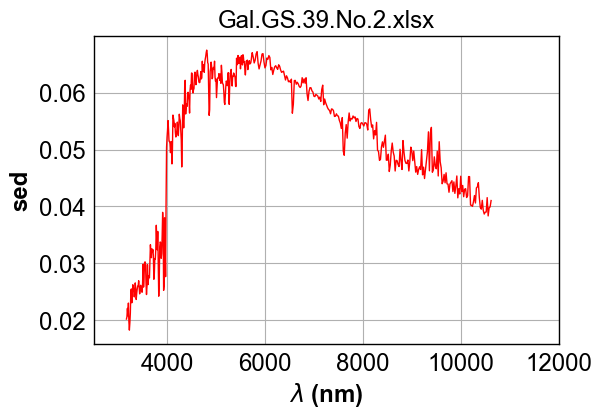

In [233]:
PlotSED(sp)

In [234]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [235]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


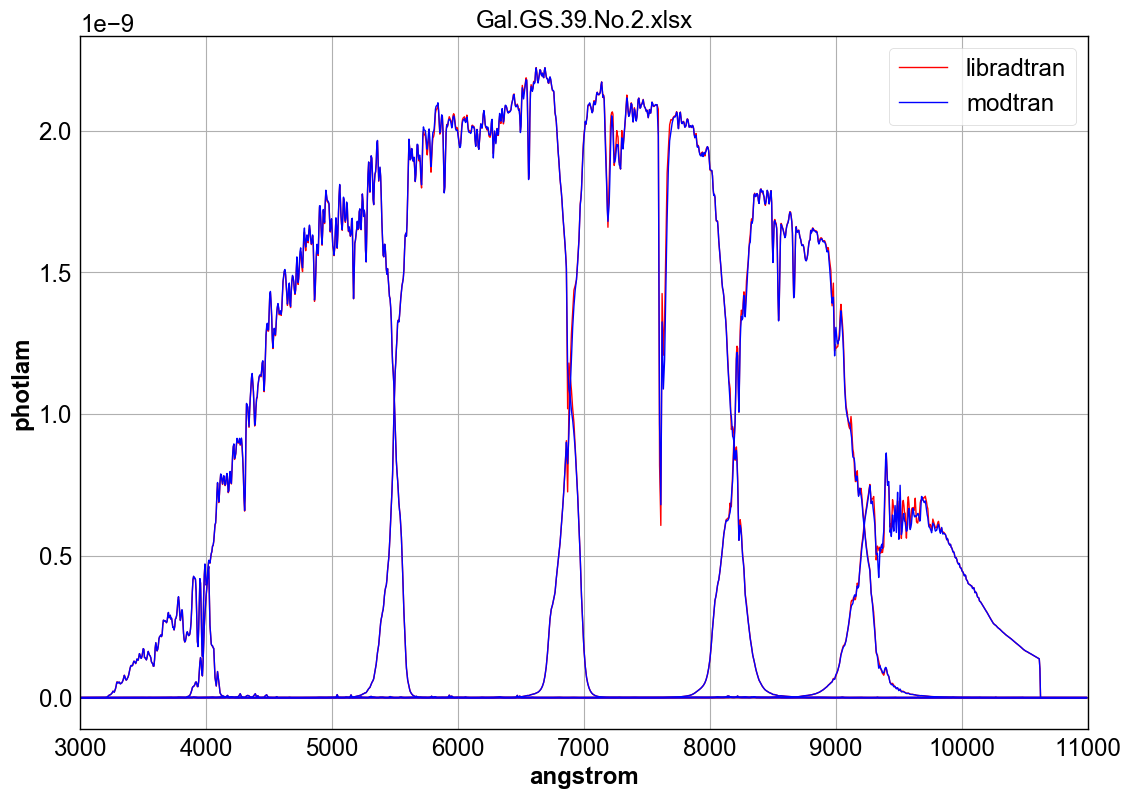

In [288]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [237]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [238]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.28,2.49,-0.47,-6.89,-5.56,-13.69


## Pickles
============

In [239]:
fullfilename_pick_uk= [  os.path.join(path_sed,filename_pick_uk_xcl[j])  for j in range(0,2) ]

### Pick.UK.No.2.22.

In [240]:
wl_pick_0,sed_pick_0=magnit.ReadSED(fullfilename_pick_uk[0],headerstop=38)

In [243]:
wl_pick_0*=10

In [278]:
title=filename_pick_uk_xcl[0]

In [244]:
sp = S.ArraySpectrum(wl_pick_0,sed_pick_0, name=filename_pick_uk_xcl[0])

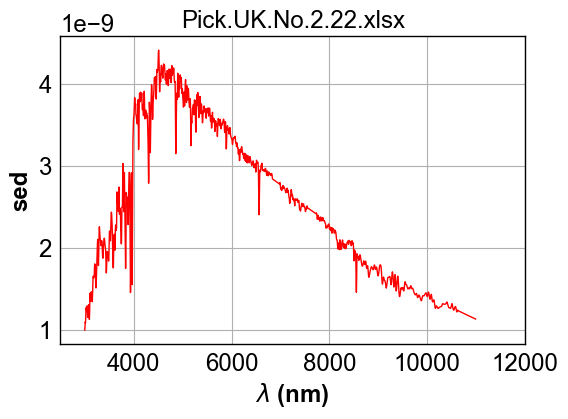

In [245]:
PlotSED(sp)

In [246]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [247]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


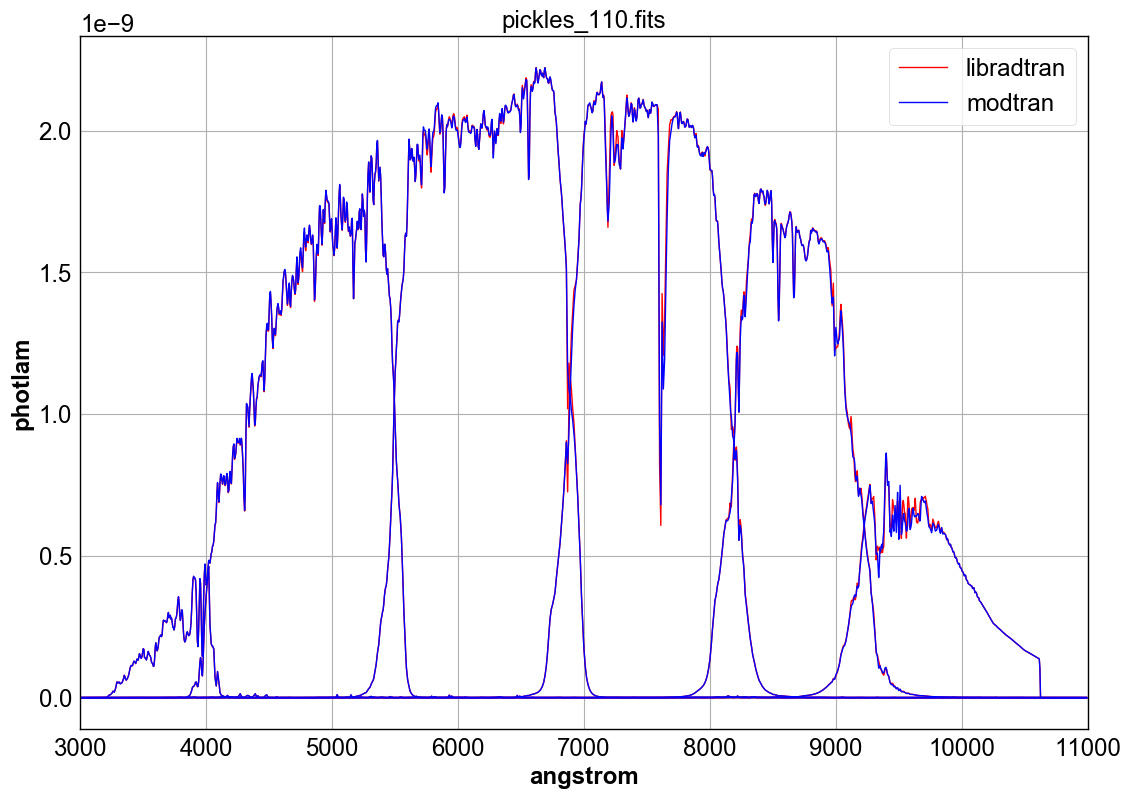

In [277]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [249]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [250]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.27,2.56,-0.36,-7.01,-5.46,-13.42


### Pick UK 50
----------------

In [251]:
wl_pick_1,sed_pick_1=magnit.ReadSED(fullfilename_pick_uk[1],headerstop=38)

In [253]:
wl_pick_1*=10

In [254]:
title=filename_pick_uk_xcl[1]

In [257]:
sp = S.ArraySpectrum(wl_pick_1,sed_pick_1, name=filename_pick_uk_xcl[1])

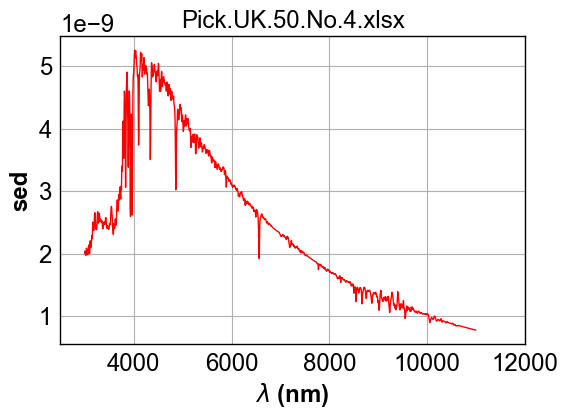

In [258]:
PlotSED(sp)

In [274]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [260]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


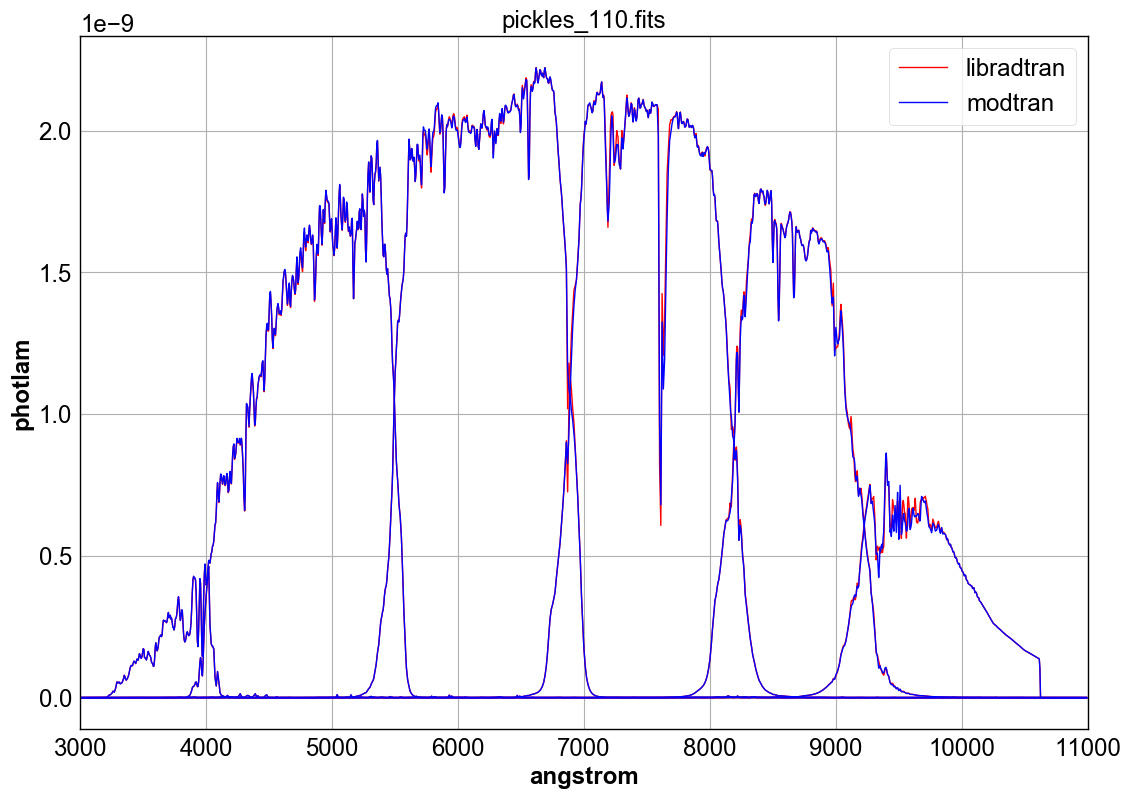

In [276]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [261]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [262]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.38,2.64,-0.26,-7.01,-5.53,-13.23


## Pickles 110
====================

### Pickles No 110
-------------------

In [263]:
fullfilename_pick_110= [  os.path.join(path_sed,filename_pick_110[j])  for j in range(0,3) ]

In [264]:
wl_pick_110,sed_pick_110=magnit.ReadSED(fullfilename_pick_110[0],headerstop=38)

In [265]:
title=filename_pick_110[0]

In [266]:
wl_pick_110*=10

In [268]:
sp = S.ArraySpectrum(wl_pick_110,sed_pick_110, name=filename_pick_110[0])

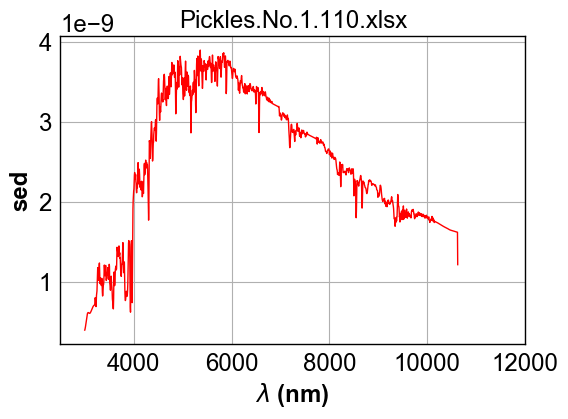

In [269]:
PlotSED(sp)

In [270]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [271]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


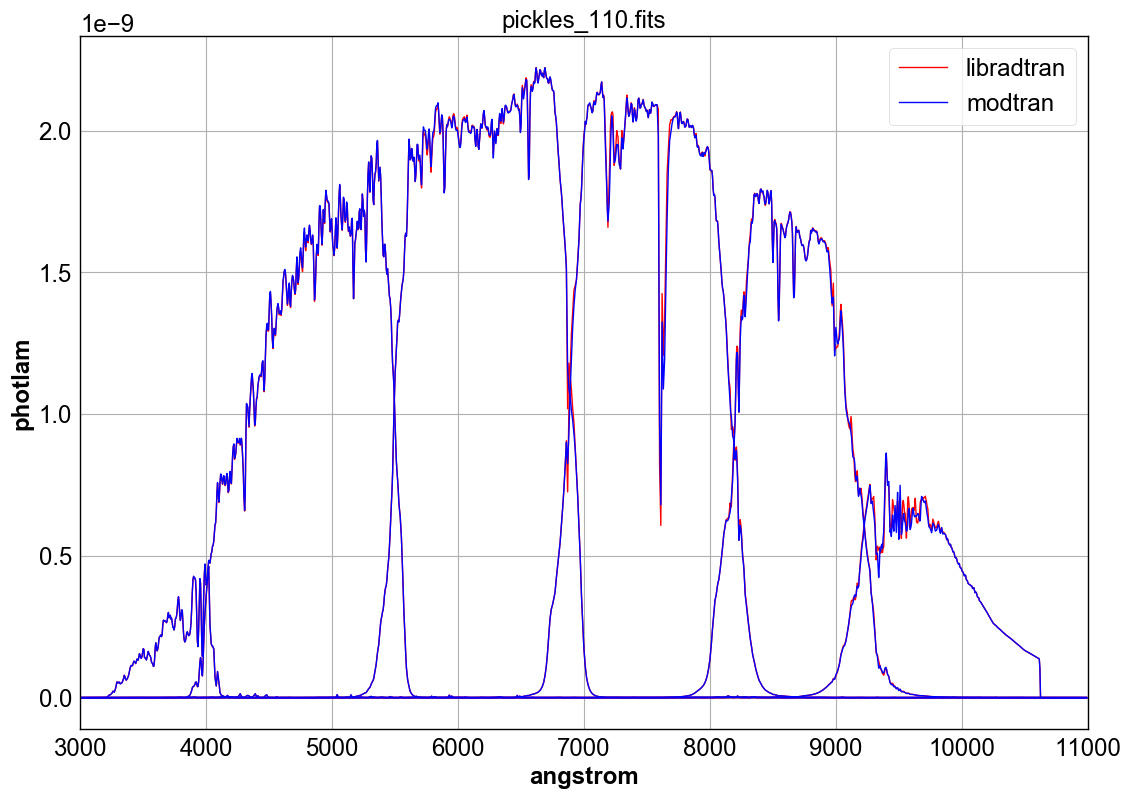

In [275]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [289]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [290]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.25,2.44,-0.43,-6.98,-5.44,-13.3


## Galaxy with varying Z
===============================

In [291]:
fullfilename_gal_allz= os.path.join(path_sed,filename_gal_allz) 

### z=0
--------

In [292]:
wl_gal_z0,sed_gal_z0=magnit.ReadSED(fullfilename_gal_allz,headerstop=2,cmin=0,cmax=2)

In [294]:
wl_gal_z0*=10

In [293]:
title='gal_z0_'+filename_gal_allz

In [295]:
sp = S.ArraySpectrum(wl_gal_z0,sed_gal_z0, name=title)

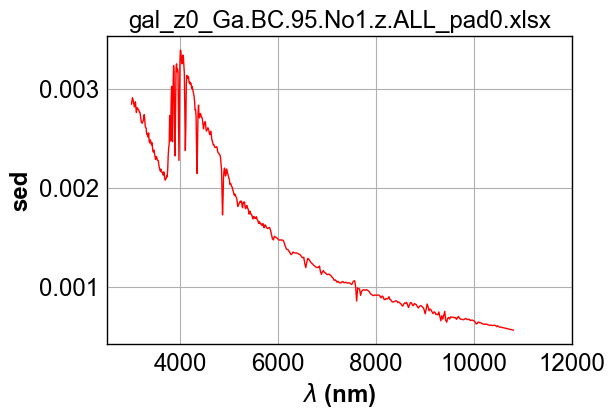

In [296]:
PlotSED(sp)

In [297]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [298]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


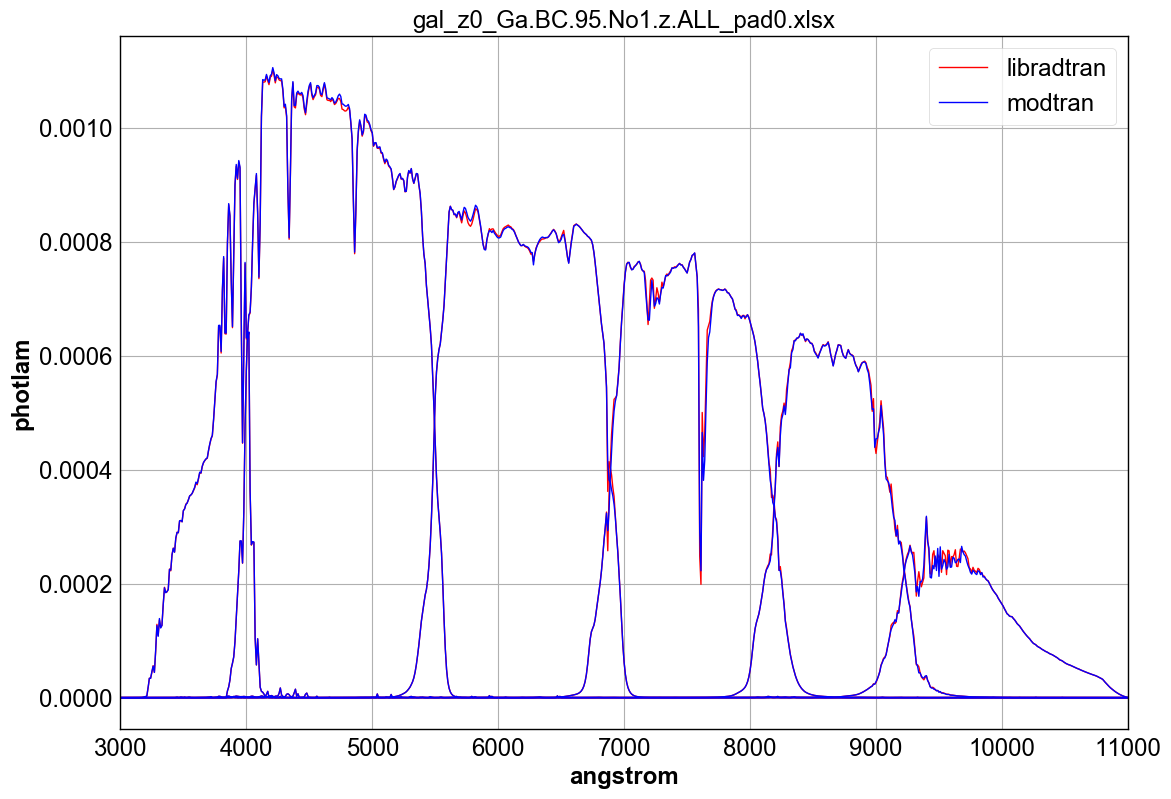

In [299]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [300]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [301]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.27,2.72,-0.28,-7.0,-5.49,-13.11


### z=1
--------

In [321]:
wl_gal_z1,sed_gal_z1=magnit.ReadSED(fullfilename_gal_allz,headerstop=2,cmin=3,cmax=5)

In [322]:
wl_gal_z1*=10

In [323]:
title='gal_z1_'+filename_gal_allz

In [325]:
sp = S.ArraySpectrum(wl_gal_z1,sed_gal_z1, name=title)

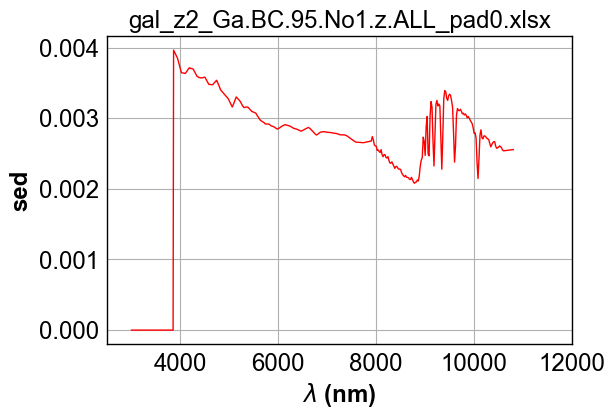

In [317]:
PlotSED(sp)

In [308]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [309]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


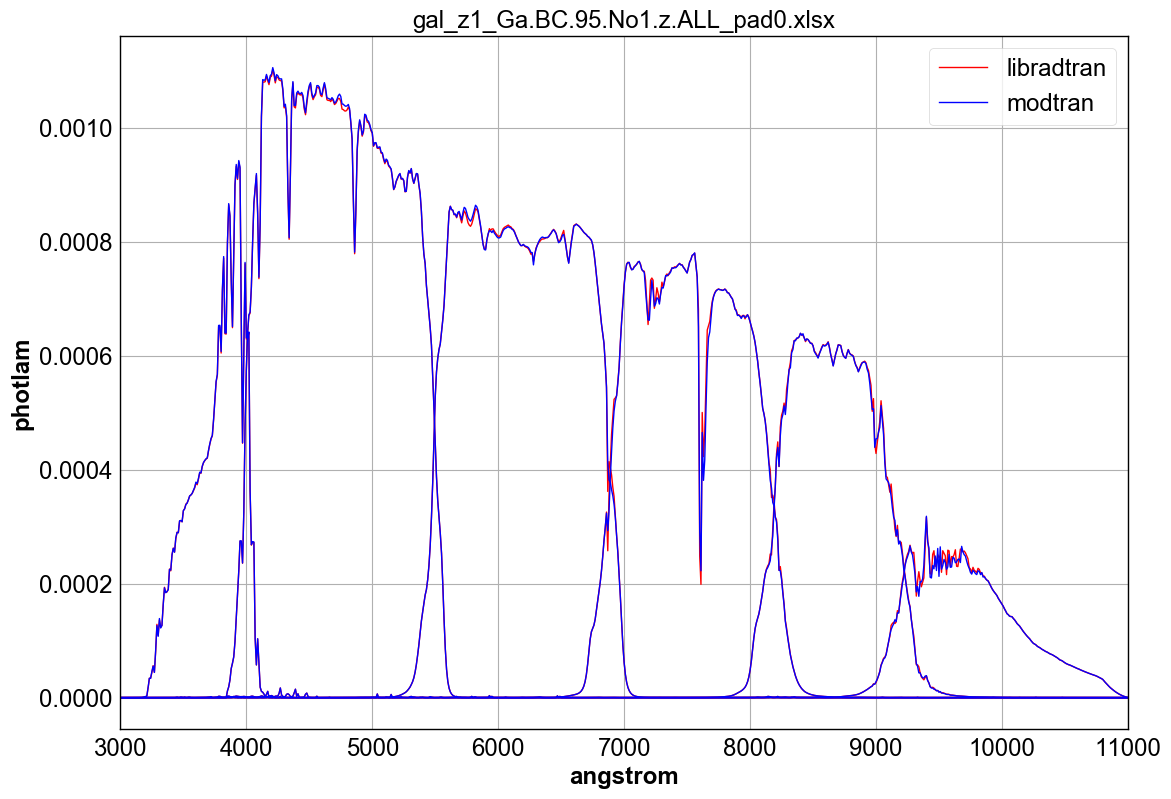

In [310]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [311]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [312]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.27,2.72,-0.28,-7.0,-5.49,-13.11


## z=2
---------

In [326]:
wl_gal_z2,sed_gal_z2=magnit.ReadSED(fullfilename_gal_allz,headerstop=2,cmin=6,cmax=8)

In [327]:
wl_gal_z2*=10

In [328]:
title='gal_z2_'+filename_gal_allz

In [329]:
sp = S.ArraySpectrum(wl_gal_z2,sed_gal_z2, name=title)

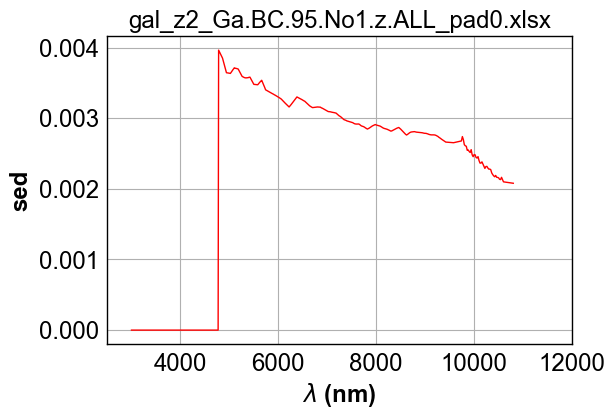

In [330]:
PlotSED(sp)

In [331]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [332]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


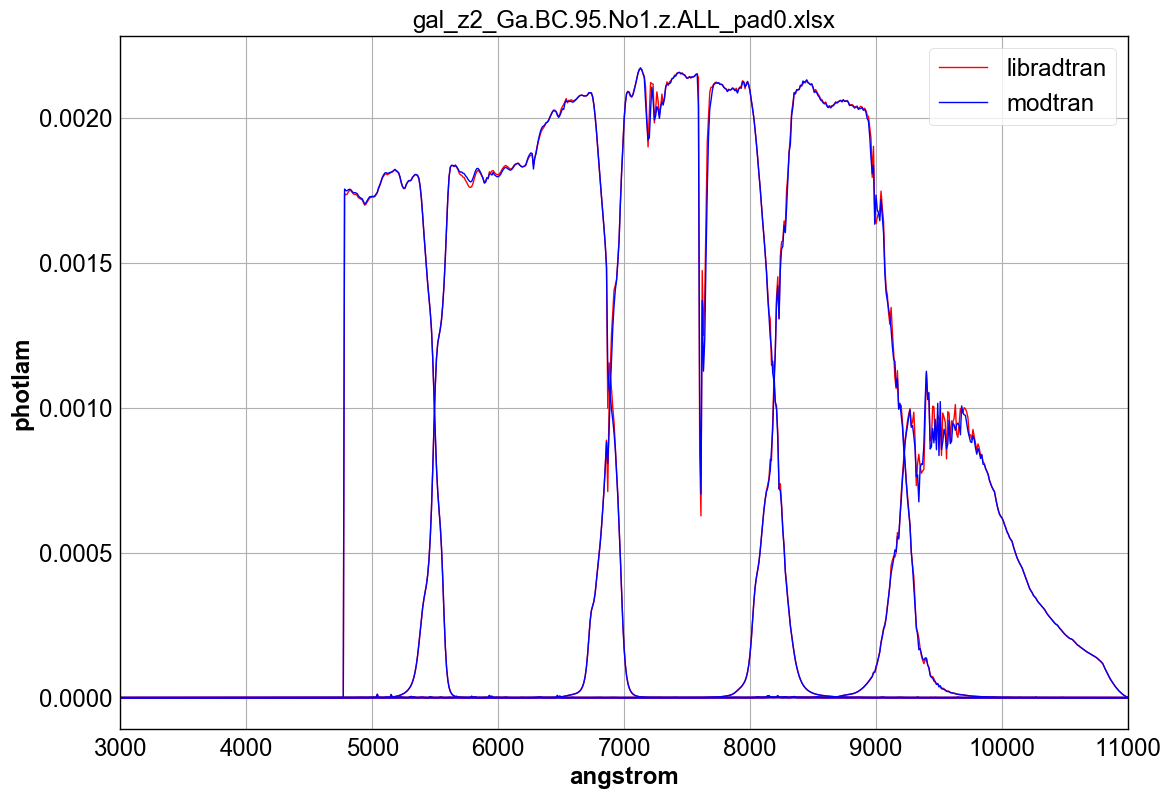

In [333]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [334]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [335]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
-3.66,1.64,-0.48,-6.97,-5.5,-13.39


## z=3
--------

In [336]:
wl_gal_z3,sed_gal_z3=magnit.ReadSED(fullfilename_gal_allz,headerstop=2,cmin=9,cmax=11)

In [338]:
wl_gal_z3*=10

In [337]:
title='gal_z3_'+filename_gal_allz

In [339]:
sp = S.ArraySpectrum(wl_gal_z2,sed_gal_z2, name=title)

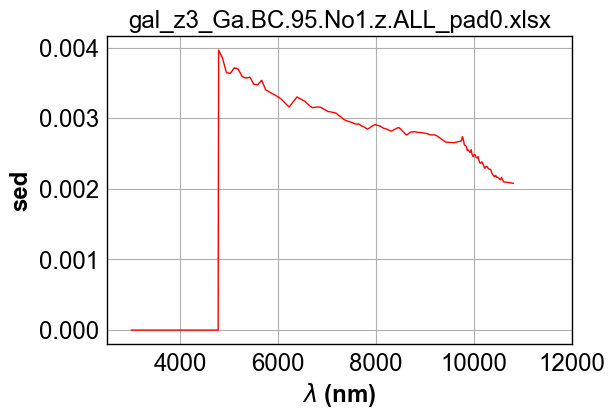

In [340]:
PlotSED(sp)

In [341]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [342]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


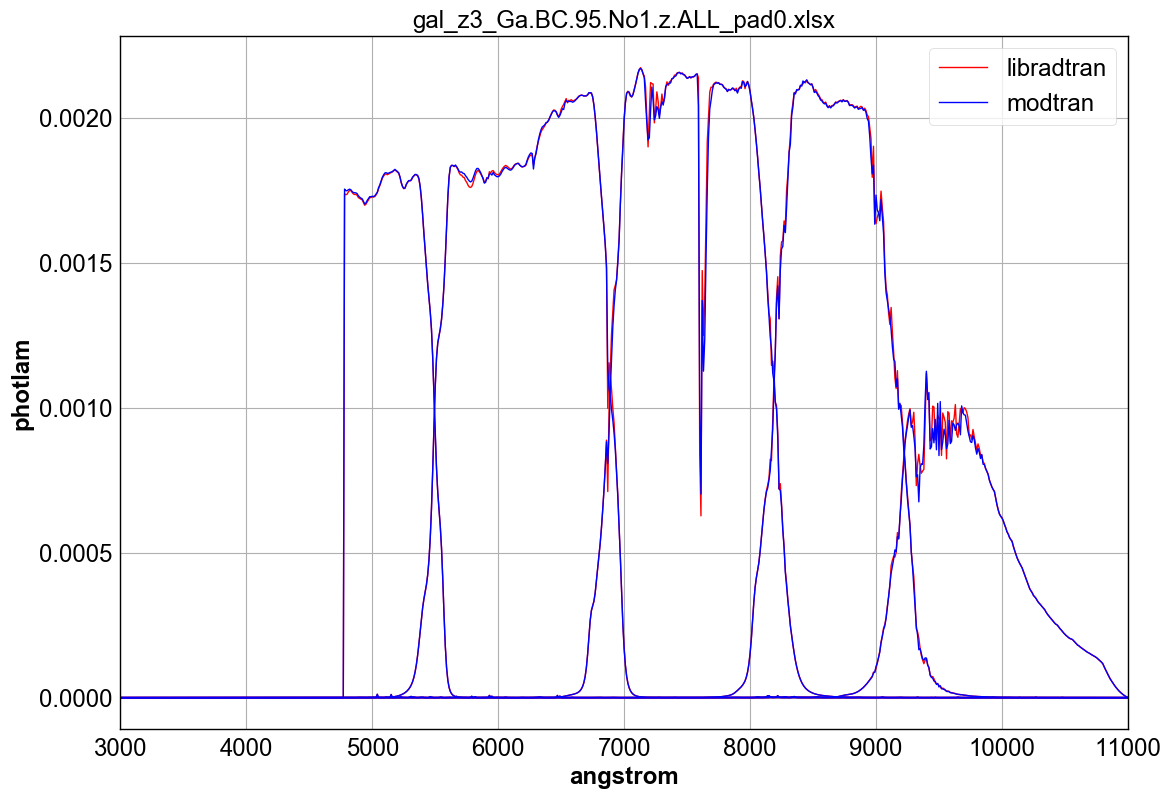

In [343]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [344]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [345]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
-3.66,1.64,-0.48,-6.97,-5.5,-13.39


### z=4
---------

In [346]:
wl_gal_z4,sed_gal_z4=magnit.ReadSED(fullfilename_gal_allz,headerstop=2,cmin=12,cmax=14)

In [348]:
wl_gal_z4*=10

In [347]:
title='gal_z4_'+filename_gal_allz

In [349]:
sp = S.ArraySpectrum(wl_gal_z2,sed_gal_z2, name=title)

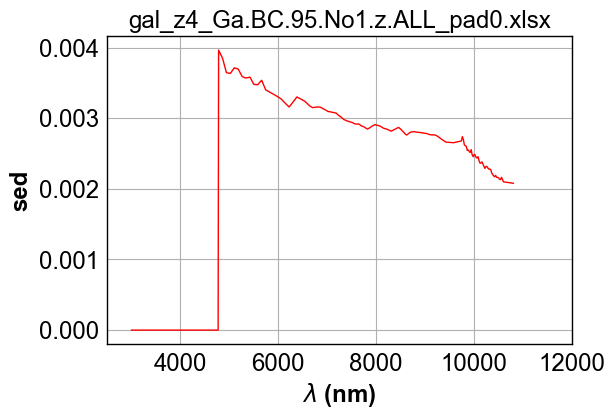

In [350]:
PlotSED(sp)

In [351]:
obs_u_rt = S.Observation(sp,bp_u_atm_rt,force='taper')
obs_g_rt = S.Observation(sp,bp_g_atm_rt,force='taper')
obs_r_rt = S.Observation(sp,bp_r_atm_rt,force='taper')
obs_i_rt = S.Observation(sp,bp_i_atm_rt,force='taper')
obs_z_rt = S.Observation(sp,bp_z_atm_rt,force='taper')
obs_y4_rt = S.Observation(sp,bp_y4_atm_rt,force='taper')

(LSST_U_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_RT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [352]:
obs_u_mt = S.Observation(sp,bp_u_atm_mt,force='taper')
obs_g_mt = S.Observation(sp,bp_g_atm_mt,force='taper')
obs_r_mt = S.Observation(sp,bp_r_atm_mt,force='taper')
obs_i_mt = S.Observation(sp,bp_i_atm_mt,force='taper')
obs_z_mt = S.Observation(sp,bp_z_atm_mt,force='taper')
obs_y4_mt = S.Observation(sp,bp_y4_atm_mt,force='taper')

(LSST_U_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM_MT) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


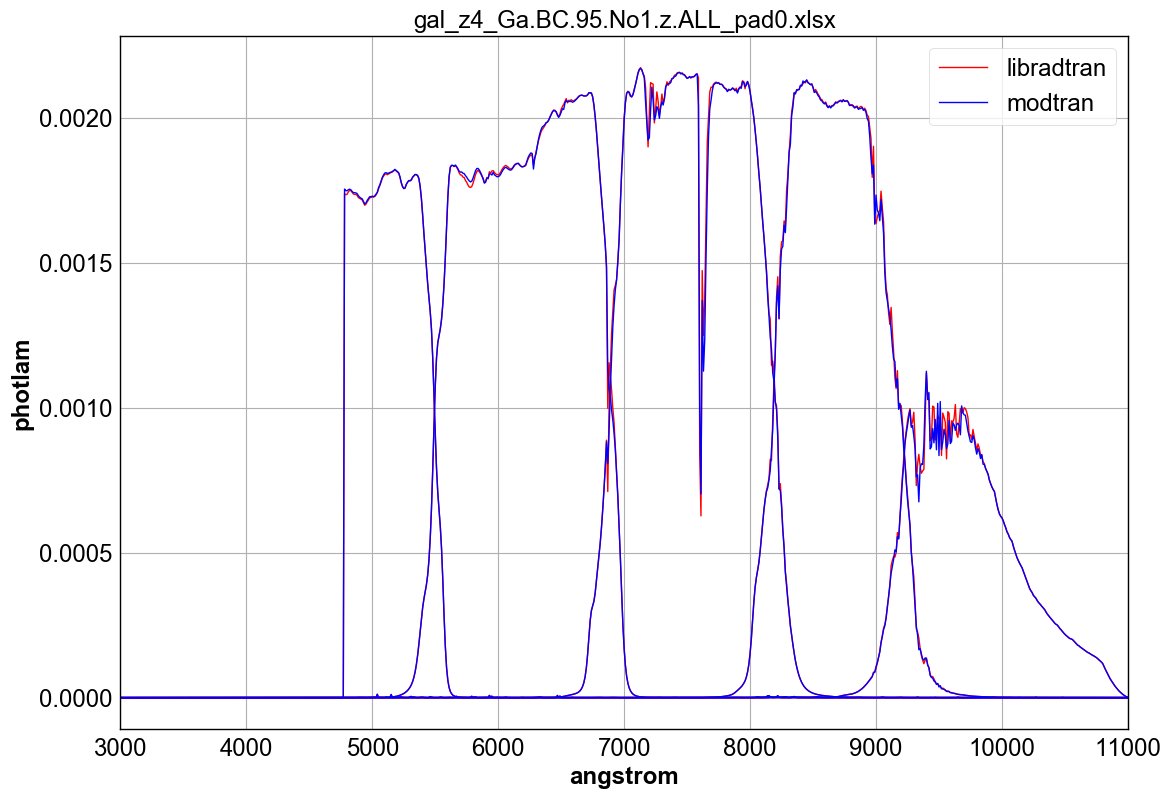

In [353]:
plt.plot(obs_u_rt.wave,obs_u_rt.flux,'r',label='libradtran')
plt.plot(obs_g_rt.wave,obs_g_rt.flux,'r')
plt.plot(obs_r_rt.wave,obs_r_rt.flux,'r')
plt.plot(obs_i_rt.wave,obs_i_rt.flux,'r')
plt.plot(obs_z_rt.wave,obs_z_rt.flux,color='r')
plt.plot(obs_y4_rt.wave,obs_y4_rt.flux,'r')

plt.plot(obs_u_mt.wave,obs_u_mt.flux,'b',label='modtran')
plt.plot(obs_g_mt.wave,obs_g_mt.flux,'b')
plt.plot(obs_r_mt.wave,obs_r_mt.flux,'b')
plt.plot(obs_i_mt.wave,obs_i_mt.flux,'b')
plt.plot(obs_z_mt.wave,obs_z_mt.flux,'b')
plt.plot(obs_y4_mt.wave,obs_y4_mt.flux,'b')

plt.xlim(3000.,11000)
plt.xlabel(obs_u_rt.waveunits)
plt.ylabel(obs_u_rt.fluxunits)
plt.title(title)
plt.legend()

In [354]:
mag_rt=np.array([obs_u_rt.effstim('obmag'),obs_g_rt.effstim('obmag'),obs_r_rt.effstim('obmag'),obs_i_rt.effstim('obmag'),
...              obs_z_rt.effstim('obmag'),obs_y4_rt.effstim('obmag')])
mag_mt=np.array([obs_u_mt.effstim('obmag'),obs_g_mt.effstim('obmag'),obs_r_mt.effstim('obmag'),obs_i_mt.effstim('obmag'),
...              obs_z_mt.effstim('obmag'),obs_y4_mt.effstim('obmag')])

In [355]:
ShowMagnitudeTable(mag_rt,mag_mt)

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
-3.66,1.64,-0.48,-6.97,-5.5,-13.39
